In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import missingno as msno

In [2]:
df = pd.read_csv('help.csv') #загружаем датасет
df.head(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 13196900,homeowner,https://balashikha.cian.ru/sale/flat/307612084/,Балашиха,sale,flat,7,15,1,23.0,...,-1,-1,-1,-1,79623671587,NaN,Реутовская,14,Реутов,Измайловский лес
1,На Петровке,real_estate_agent,https://balashikha.cian.ru/sale/flat/306908232/,Балашиха,sale,flat,12,16,1,24.0,...,-1,-1,15 м²,4 м²,79623644015,NaN,Яганова,5,Щёлковская,Пехра
2,ОГРК,real_estate_agent,https://balashikha.cian.ru/sale/flat/294341061/,Балашиха,sale,flat,13,18,1,23.7,...,-1,-1,14 м²,4 м²,79672089940,NaN,Яганова,12,Щёлковская,Пехра
3,ИНКОМ-Недвижимость,real_estate_agent,https://balashikha.cian.ru/sale/flat/308998076/,Балашиха,sale,flat,11,18,1,37.5,...,-1,-1,"17,1 м²","11,2 м²",79671668161,NaN,Зеленая,33,Никольское,Жемчужина Балашихи
4,Пилигрим,real_estate_agent,https://balashikha.cian.ru/sale/flat/308475077/,Балашиха,sale,flat,12,21,1,41.0,...,-1,-1,20 м²,9 м²,79183721059,NaN,Граничная,38,Ольгино,NaN


In [3]:
df.columns #смотрим колонки

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'house_material_type', 'heating_type', 'finish_type', 'living_meters',
       'kitchen_meters', 'phone', 'district', 'street', 'house_number',
       'underground', 'residential_complex'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                8505 non-null   object 
 1   author_type           8512 non-null   object 
 2   url                   8790 non-null   object 
 3   location              8790 non-null   object 
 4   deal_type             8790 non-null   object 
 5   accommodation_type    8790 non-null   object 
 6   floor                 8790 non-null   int64  
 7   floors_count          8790 non-null   int64  
 8   rooms_count           8790 non-null   int64  
 9   total_meters          8790 non-null   float64
 10  price                 8745 non-null   float64
 11  year_of_construction  8790 non-null   object 
 12  object_type           8790 non-null   int64  
 13  house_material_type   8790 non-null   object 
 14  heating_type          8790 non-null   int64  
 15  finish_type          

In [5]:
df.describe() #сразу можем увидеть некорректные значения

,floor,floors_count,rooms_count,total_meters,price,object_type,heating_type
count,8790.000000,8790.000000,8790.000000,8790.000000,8.745000e+03,8790.0,8790.0
mean,8.077247,15.163709,2.170535,69.417416,3.674050e+07,-1.0,-1.0
std,7.852814,10.909444,1.150293,52.499836,1.005517e+08,0.0,0.0
min,1.000000,1.000000,-1.000000,11.000000,6.500000e+05,-1.0,-1.0
25%,3.000000,8.000000,1.000000,40.000000,6.300000e+06,-1.0,-1.0
50%,5.000000,14.000000,2.000000,53.900000,9.200000e+06,-1.0,-1.0
75%,11.000000,20.000000,3.000000,75.000000,1.850000e+07,-1.0,-1.0
max,82.000000,95.000000,5.000000,663.000000,2.418390e+09,-1.0,-1.0


In [6]:
df.replace('-1', np.nan, inplace=True) #заменяем некорректные значения
df.replace(-1, np.nan, inplace=True)

In [7]:
df[['living_meters']].describe() #смотрим описание колонки

,living_meters
count,6857
unique,804
top,18 м²
freq,296


In [8]:
df['living_meters'] = df['living_meters'].str[:-3] #переводим строки в float, заполняем пропуски средним
df['living_meters'] = df['living_meters'].str.replace(',', '.', regex=False)
df['living_meters'] = df['living_meters'].astype(float)
average = df['living_meters'].mean()
df['living_meters'] = df['living_meters'].fillna(average)

In [9]:
df[['living_meters']].describe() #проверяем

,living_meters
count,8790.000000
mean,36.350707
std,25.630850
min,1.000000
25%,20.500000
50%,35.000000
75%,38.000000
max,350.000000


In [10]:
df['kitchen_meters'] = df['kitchen_meters'].str[:-3] #то же самое для кухонь
df['kitchen_meters'] = df['kitchen_meters'].str.replace(',', '.', regex=False)
df['kitchen_meters'] = df['kitchen_meters'].astype(float)
average = df['kitchen_meters'].mean()
df['kitchen_meters'] = df['kitchen_meters'].fillna(average)

In [11]:
df = df[(df['living_meters'] >= 14) & (df['kitchen_meters'] >= 5)]

<Axes: >

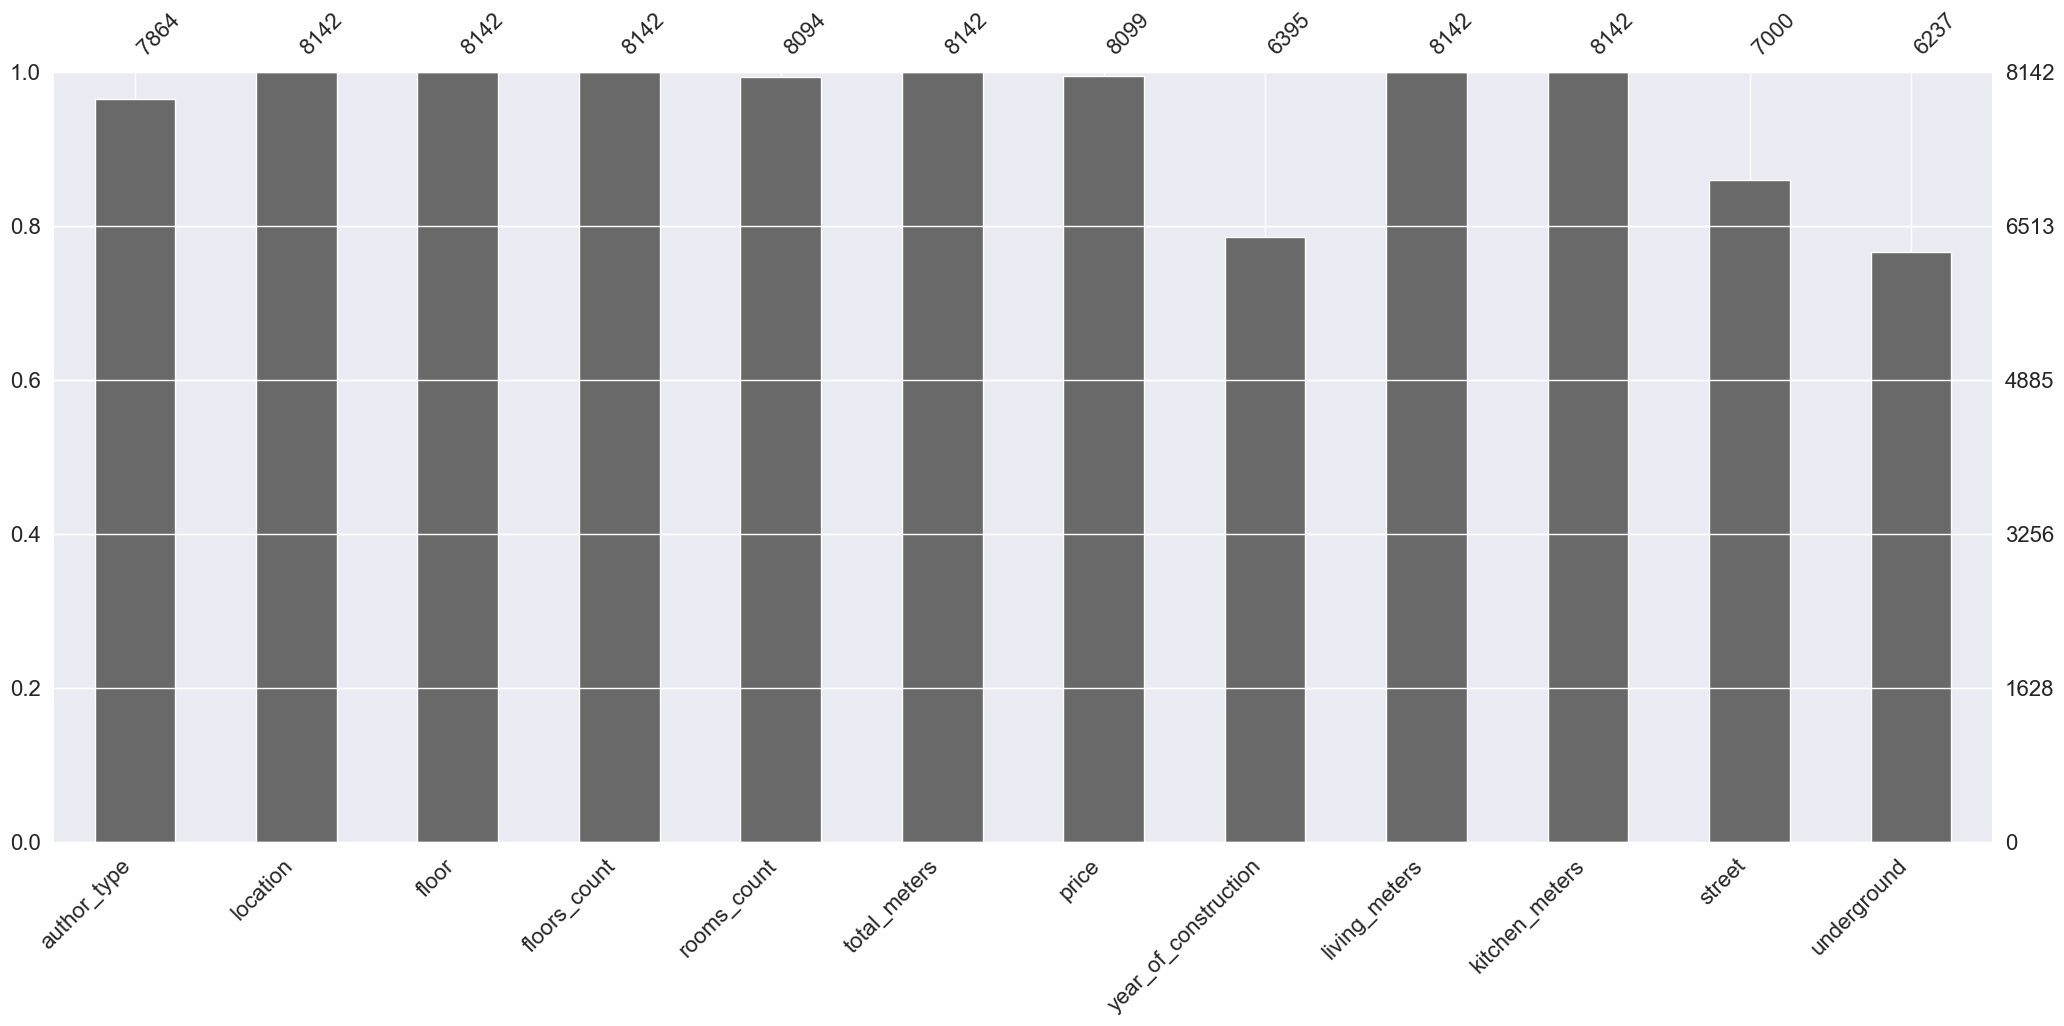

In [24]:
sns.set() #смотрим количество незаполненных данных
msno.bar(df)

In [25]:
df.isna().mean()*100 #смотрим количество пропусков в процентах

author_type              3.414394
location                 0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.589536
total_meters             0.000000
price                    0.528126
year_of_construction    21.456645
living_meters            0.000000
kitchen_meters           0.000000
street                  14.026038
underground             23.397200
dtype: float64

In [18]:
def number_encode_features(init_df): #кодируем данные и проверяем
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: 
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,street,house_number,underground
0,1,1,7,15,1.0,23.0,7070000.0,114,36.350707,12.128759,357,157,209
3,3,1,11,18,1.0,37.5,6400000.0,128,17.100000,11.200000,660,509,151
4,3,1,12,21,1.0,41.0,5900000.0,106,20.000000,9.000000,130,562,169
5,7,1,14,17,1.0,31.9,6812883.0,118,36.350707,12.128759,64,201,73
6,4,1,9,19,1.0,37.5,6050000.0,110,19.000000,8.000000,358,777,114


array([[<Axes: title={'center': 'author'}>,
        <Axes: title={'center': 'author_type'}>,
        <Axes: title={'center': 'url'}>,
        <Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'deal_type'}>],
       [<Axes: title={'center': 'accommodation_type'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>,
        <Axes: title={'center': 'total_meters'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year_of_construction'}>,
        <Axes: title={'center': 'object_type'}>,
        <Axes: title={'center': 'house_material_type'}>,
        <Axes: title={'center': 'heating_type'}>],
       [<Axes: title={'center': 'finish_type'}>,
        <Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>,
        <Axes: title={'center': 'phone'}>,
        <Axes: title={'center': 'district'}>],
       [<Axes: title={'

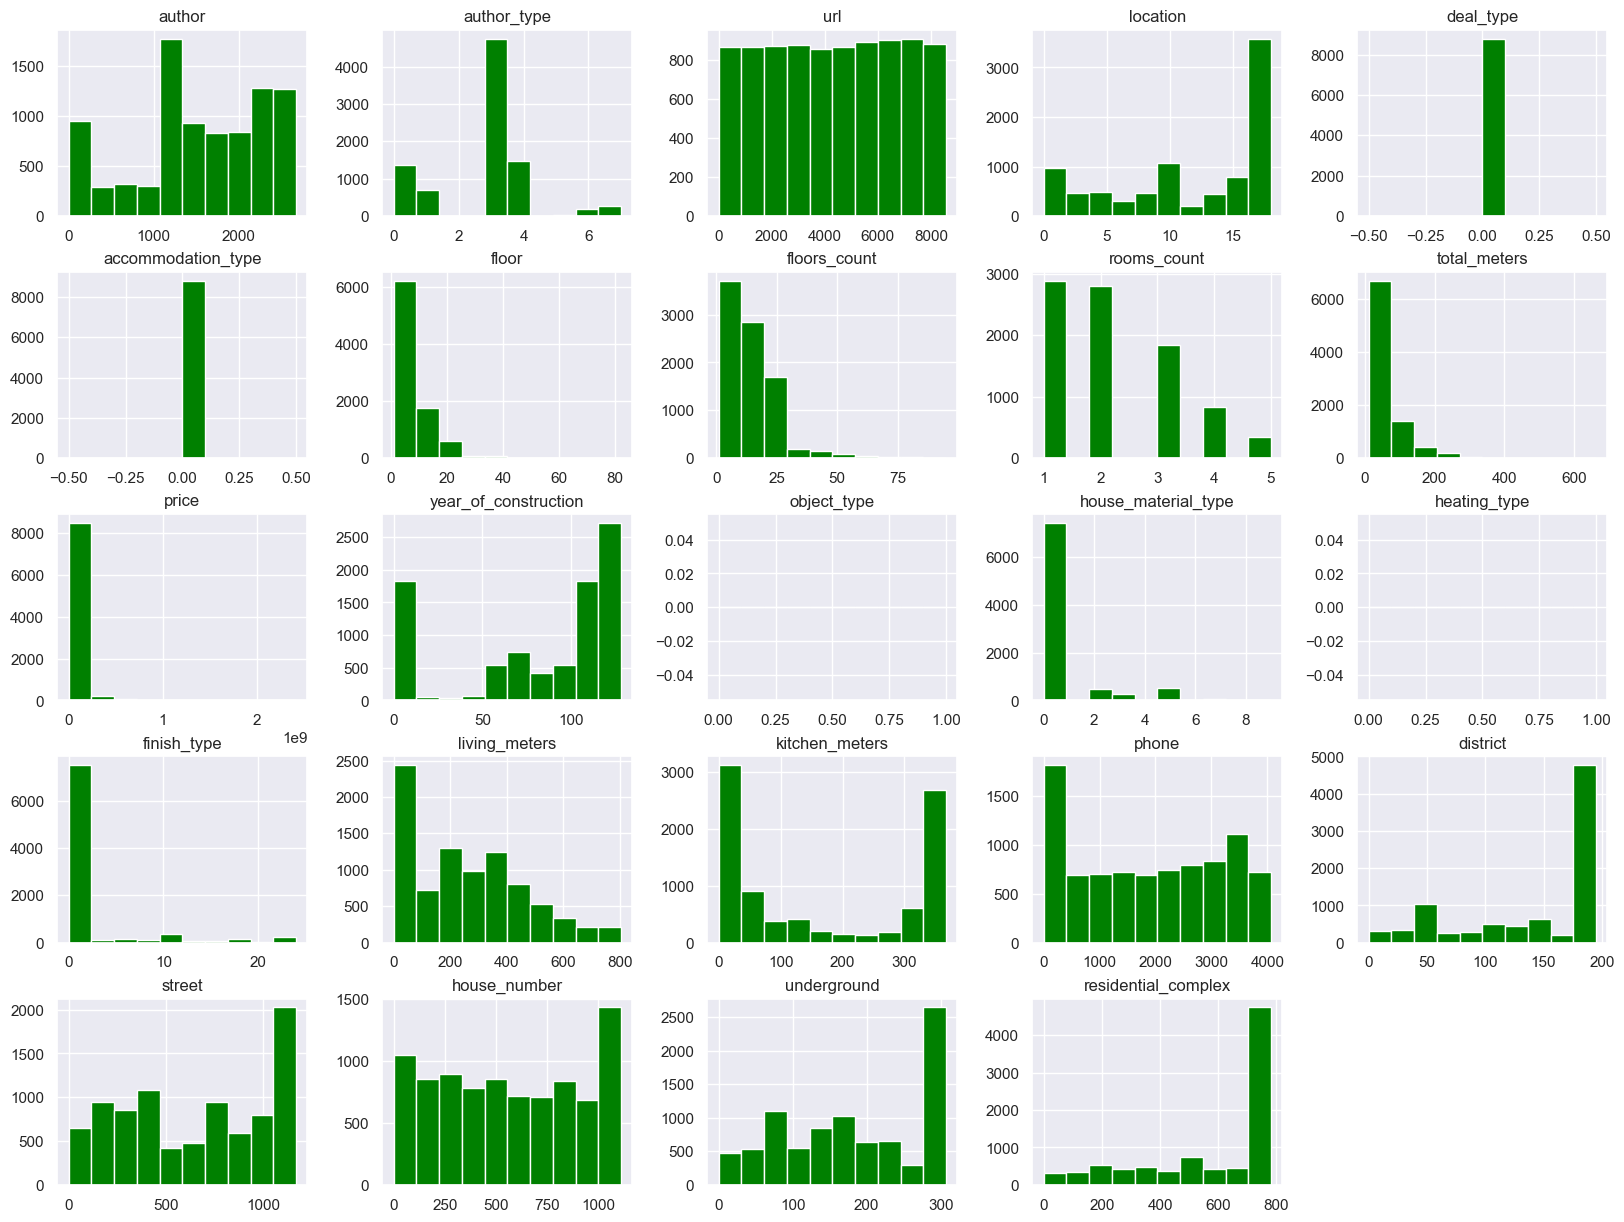

In [13]:
encoded_data.hist(figsize=(20,15), color='green') #смотрим красивые картиночки

<Axes: >

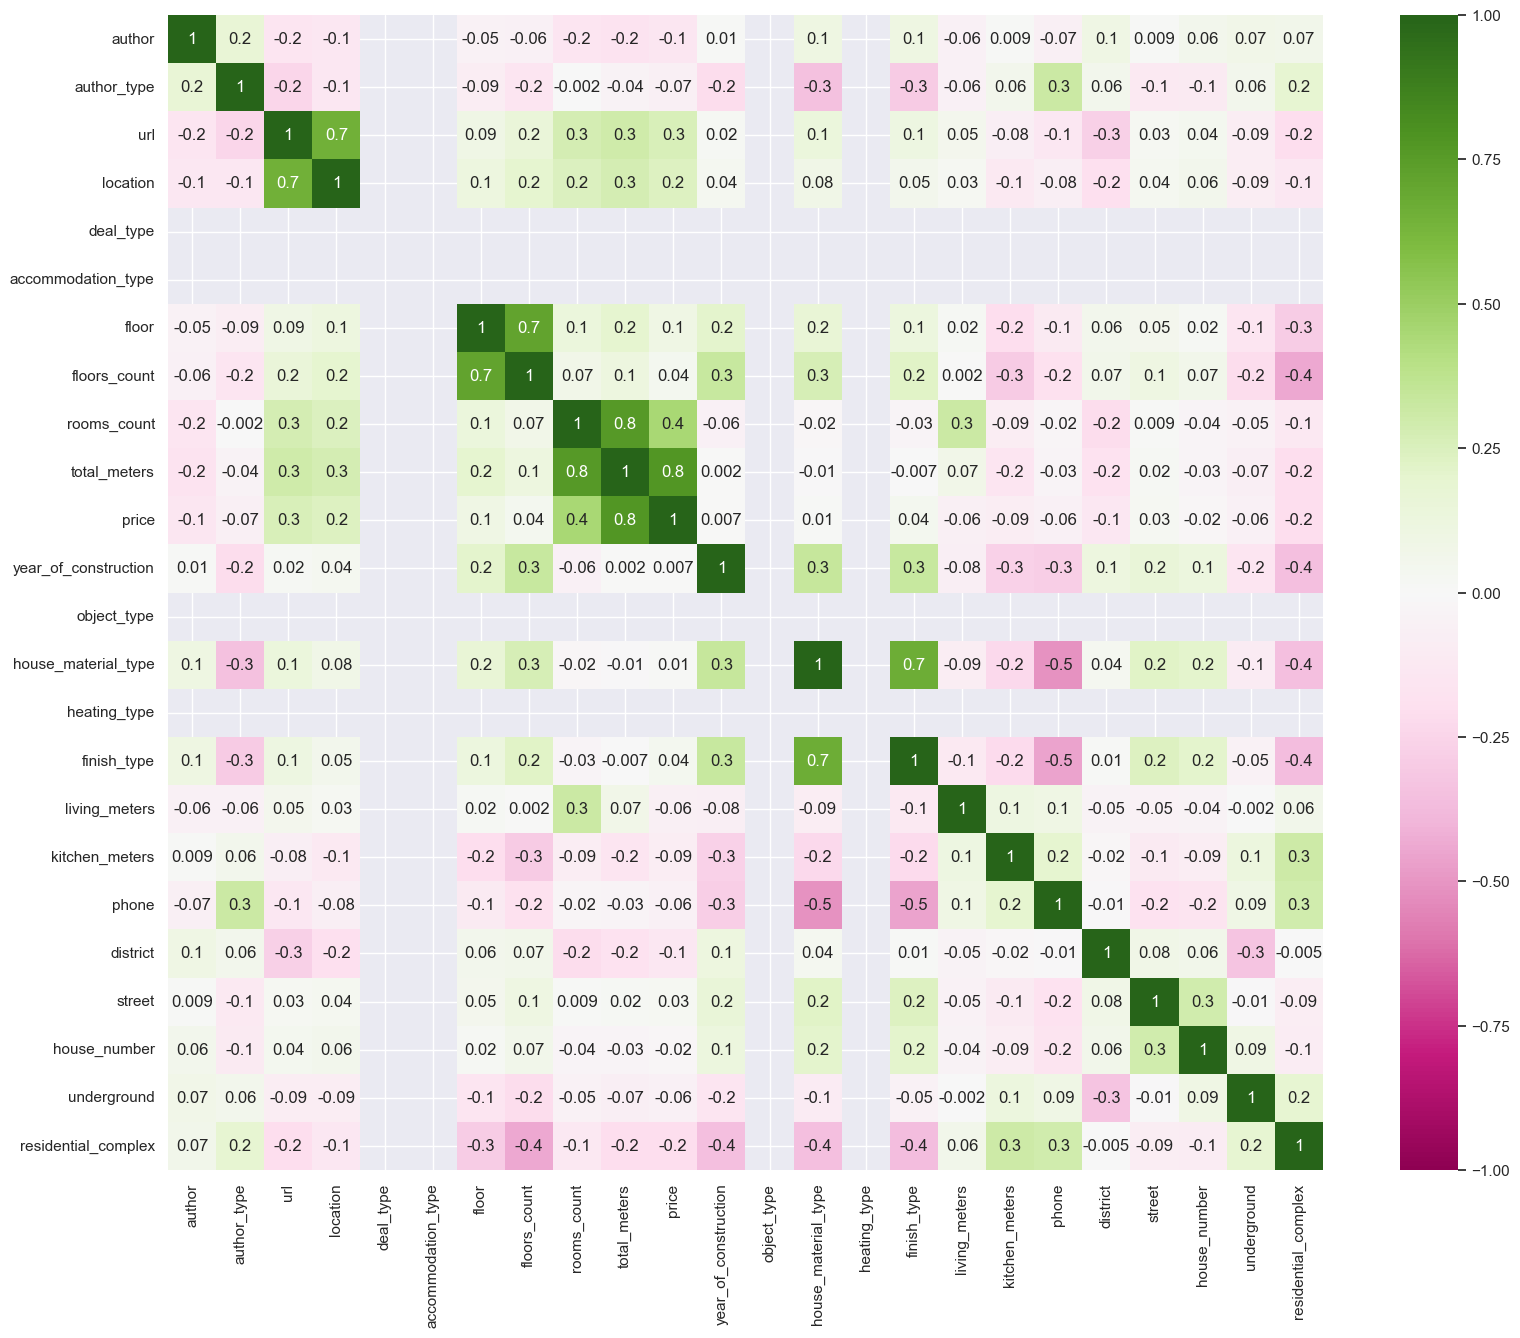

In [14]:
encoded_data, encoders = number_encode_features(df) #смотрим корреляцию
plt.subplots(figsize=(20,15))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='PiYG', fmt='.1g', vmin=-1, vmax=1, center= 0)

In [14]:
df = df.drop(['deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis=1) #отбрасываем пустые колонки 

In [15]:
df = df.drop(['residential_complex','district','house_material_type','finish_type'], axis=1) #мало данных => отбрасываем
df = df.drop(['phone', 'url','author'], axis=1) #уникальные значения => отбрасываем


In [28]:
df = df.drop(['house_number'], axis=1) #не влияет на цену

KeyError: "['house_number'] not found in axis"

<Axes: >

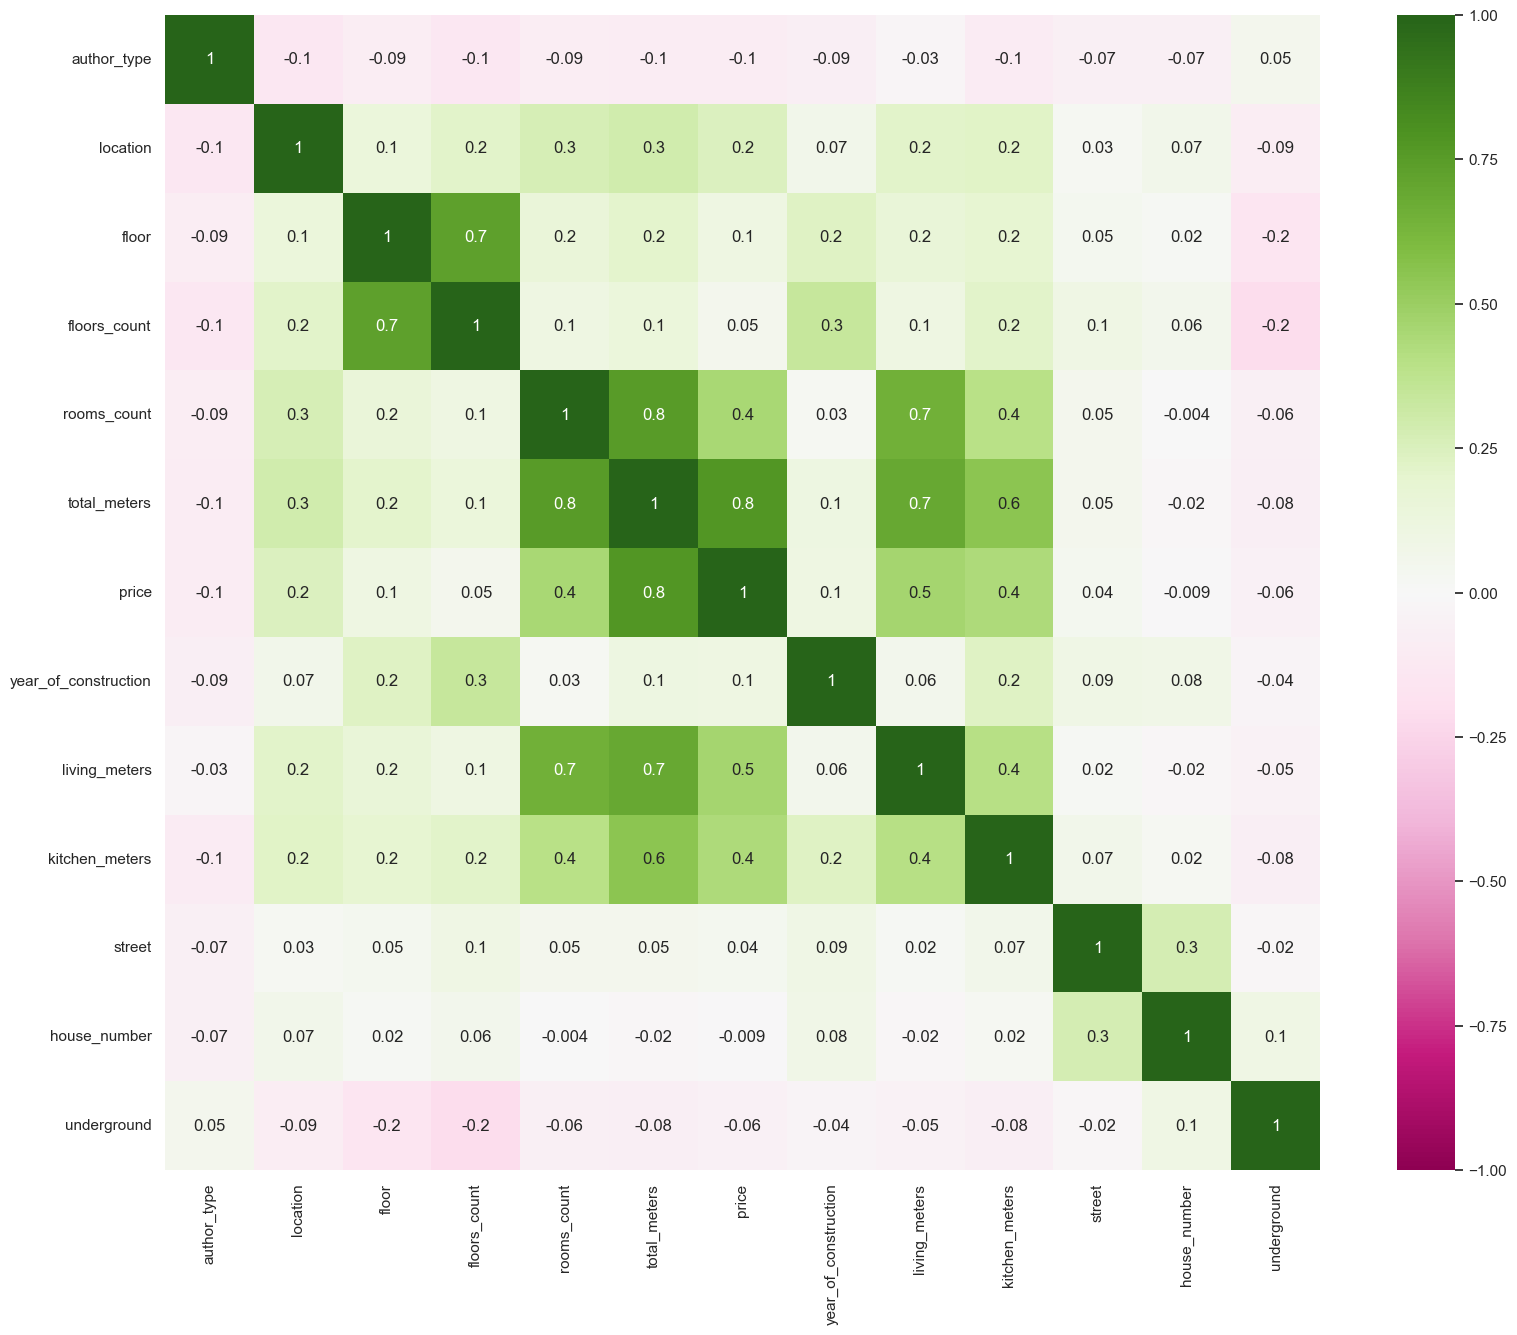

In [29]:
#смотрим корреляцию
plt.subplots(figsize=(20,15))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='PiYG', fmt='.1g', vmin=-1, vmax=1, center= 0)